# ACME: Pandas 3
## Jincheng(Eric) Huang

1. Examine the following data sets from pydataset and answer the corresponding questions. Use visualizations to support your conclusions.

    • "iris", measurements of various species of iris flowers.
        1. Which species is easiest to distinguish from the others? How?        
        2. Given iris data without a species label, what strategies could you use to identify the flower’s species?
        
    • "poisons", experimental results of three different poisons and four different treatments.
        1. In general, which poison is most deadly? Which treatment is most effective?        
        2. If you were poisoned, how would you choose the treatment if you did not know which poison it was? What if you did know which poison it was? (Hint: group the data by poison, then group each subset by treatment.)
        
    • "diamonds", prices and characteristics of almost 54,000 round-cut diamonds.    
        1. How does the color and cut of a diamond affect its price?        
        2. Of the diamonds with color "H", those with a "Fair" cut sell, on average, for a higher price than those with an "Ideal" (superior) cut. What other factors could explain this unintuitive statistic?

In [1]:
import numpy as np
import pandas as pd
from pydataset import data
from matplotlib import pyplot as plt

### Iris

In [2]:
iris = data("iris")
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


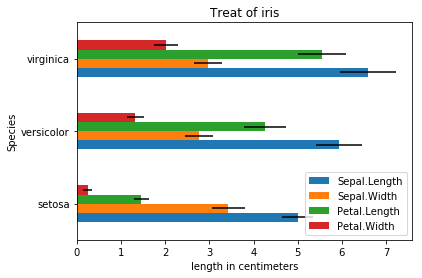

In [3]:
species = iris.groupby('Species')
species.get_group('setosa').sample(5)
species[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']].mean()\
.plot(kind = 'barh', xerr = species.std(), title = 'Treat of iris')
plt.xlabel('length in centimeters')
plt.ylabel('Species')
plt.show()

Setosa cis the easiest to distinguish, because it has very short Sepal length and width compared to the other two.

The strategy to identify the species is to first identify whether it is sentosa, using the criteria above. If not, then compare the petal width. Versicolor has wider petal than setosa.

### Poisons

In [4]:
poisons = data("poisons")
poisons.head()

,time,poison,treat
1,0.31,1,A
2,0.45,1,A
3,0.46,1,A
4,0.43,1,A
5,0.36,2,A


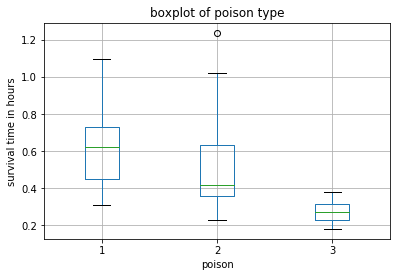

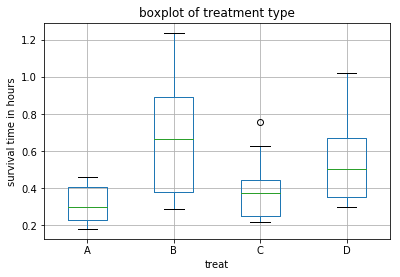

In [5]:
poison_type = poisons.groupby('poison')
treat_type = poisons.groupby('treat')

poisons.boxplot('time', by = 'poison', grid = True)
plt.ylabel('survival time in hours')
plt.title("boxplot of poison type")
plt.suptitle('')
plt.show()

poisons.boxplot('time', by = 'treat', grid = True)
plt.ylabel('survival time in hours')
plt.title("boxplot of treatment type")
plt.suptitle('')
plt.show()

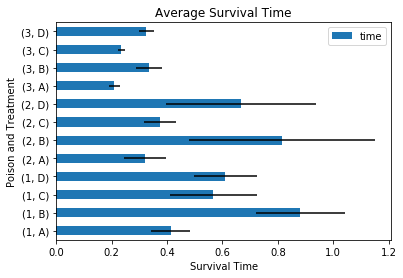

In [6]:
poison_treat = poisons.groupby(["poison", "treat"])
poison_treat[["time"]].mean().plot(kind="barh", xerr=poison_treat.std(), title="Average Survival Time")
plt.xlabel("Survival Time")
plt.ylabel("Poison and Treatment")
plt.show()

Poison 3 is the most deadly poison in general. Treatment B is most effective.
Without knowledge about the type of poison, the best choice is treatment B. It has a higher overall survival time and treats poisons 1 and 2 much better than other treatments. For poison 3, it is almost as good as treatment D and definitely better than treaments A and C.

### Diamonds

In [7]:
diamonds = data("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


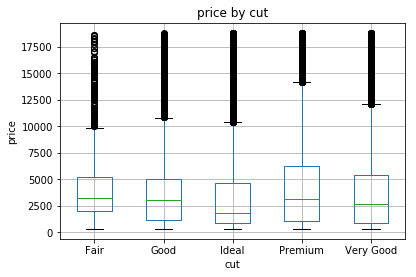

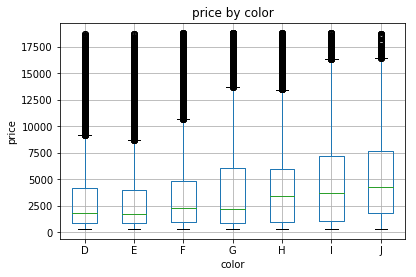

In [8]:
cut = diamonds.groupby('cut')
diamonds.boxplot('price', by = 'cut')
plt.suptitle('')
plt.title('price by cut')
plt.ylabel('price')
plt.show()

diamonds.boxplot('price', by = 'color')
plt.suptitle('')
plt.title('price by color')
plt.ylabel('price')
plt.show()

The prices are quite similar for differet cuts.  Fair cut diamonds have higher average price than ideal cut ones, but there are also a fair number of outliers in both categories, which suggests that the mean measure is not a very accurate description of prices across different types of cuts. Many other characteristics of a diamond could be related to the type of cuts. 

2. Suppose that someone claims that the city from which a passenger embarked had a strong influence on the passenger’s survival rate. Investigate this claim.

    1) Check the survival rates of the passengers based on where they embarked from (given in the "Embarked" column).
    
    2) Create a pivot table to examine survival rates based on both place of embarkment and gender.
    
    3) What do these tables suggest to you about the significance of where people embarked in influencing their survival rate? Examine the context of the problem, and explain what you think this really means.
    
    4) Investigate the claim further with at least two more pivot tables, exploring other criteria (e.g., class, age, etc.). Carefully explain your conclusions.

In [9]:
embarked = pd.read_csv('Titanic.csv')
embarked.head()

,Pclass,Survived,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked,Boat,Body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [10]:
embarked.pivot_table(values = 'Survived', index = 'Embarked', aggfunc = 'mean')

,Survived
Embarked,
C,0.555556
Q,0.357724
S,0.332604


In [11]:
embarked.pivot_table(values = 'Survived', index = 'Embarked', columns = 'Sex', aggfunc = 'mean')

Sex,female,male
Embarked,,
C,0.902655,0.305732
Q,0.616667,0.111111
S,0.680412,0.170144


In [12]:
embarked.pivot_table(values = 'Survived', index = 'Embarked', aggfunc = 'count')

,Survived
Embarked,
C,270
Q,123
S,914


People who embarked from city C have a much higher survival rate than those from Q and S.

Males embarked from all 3 places have lower survival rates than females.

It is surprising that the places from which passengers embarked is associated with the survival rate. There might be some other factors related to the prices of embarkation that affects survival rate.

In [13]:
print('Average survival rates')
embarked.pivot_table(values = 'Survived', index = 'Embarked', columns = 'Pclass', aggfunc = 'mean')

Average survival rates


Pclass,1.0,2.0,3.0
Embarked,,,
C,0.687943,0.571429,0.366337
Q,0.666667,0.285714,0.353982
S,0.559322,0.417355,0.210101


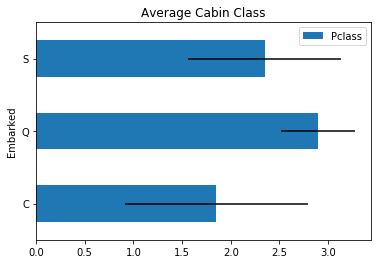

In [14]:
class_treat = embarked.groupby(['Embarked'])
class_treat[["Pclass"]].mean().plot(kind="barh", xerr=class_treat.std(), title="Average Cabin Class")

It seems that the high survival rate of people embarked from C is to some extent due to the fact that these people tended to be at better cabins. They had a better chance of escaping when the ship was in danger.